# Reto: Deserción de empleados RETO: DESERCIÓN DE EMPLEADOS
 
## Objetivo: 
 
**A través de este reto vas a lograr:** 
 
Evaluar las características de un conjunto de datos con el fin de ver si son suficientes para la actividad en la que serán usados. 
Crear nuevas características a partir de las existentes, que logren proporcionar una mayor información para la actividad en la que se usarán. 

Eliminar las características que sean irrelevantes para el uso que se le dará al conjunto de datos.
 
 
## Introducción: 
 
Una empresa de productos médicos está interesada en atraer y mantener al mejor talento porque sabe que es la clave del éxito para cualquier organización. También toma en cuenta que, si un empleado abandona la empresa, se está provocando una pérdida de tiempo y dinero debido, entre otras cosas, a la inversión en capacitación y a la experiencia acumulada del empleado. Desde luego que hay algunas formas de deserción que son inevitables, como cuando un empleado se retira o cambia de ciudad de residencia. Sin embargo, existen algunos factores que se pueden controlar por parte de la empresa con el objetivo de minimizar la deserción al mejorar las condiciones de trabajo. A la empresa le interesa saber cuáles son los factores que hacen que un empleado siga con ellos y cuáles son los que se deben cambiar debido a que provocan que los empleados se vayan. 
 
Aunque la empresa sabe que este estudio tiene muchas aristas desea empezar con algo muy simple: determinando si un empleado abandonará la empresa Attrition o no en un momento dado. Como se trata de un problema de clasificación binaria, lo más probable es que utilicen un modelo de machine learning. La empresa ha logrado recolectar 30 datos de 400 de sus empleados, pero no está segura si ese conjunto de datos sean los correctos para lo que pretende hacer, por lo que decidió contratarte como científico de datos para generar un set de datos adecuado para esta actividad. 
 
## Instrucciones:
 
**Después de una revisión completa de los datos con los que se cuentan, has decidido escribir un programa en Pyhton Jupyter Notebook llamado RetoEmpleados.ipynb bajo el siguiente plan:**
1. Importa las librerías requeridas.
2. Lee el archivo CSV llamado empleadosRETO.csv y coloca los datos en un frame de Pandas llamado EmpleadosAttrition.
3. Elimina las columnas que, con alta probabilidad (estimada por ti), no tienen relación alguna con la salida. Hay algunas columnas que contienen información que no ayuda a definir el desgaste de un empleado, tal es caso de las siguientes:
      - EmployeeCount: número de empleados, todos tienen un 1
      - EmployeeNumber: ID del empleado, el cual es único para cada empleado
      - Over18: mayores de edad, todos dicen “Y”
      - StandardHours: horas de trabajo, todos tienen “80”
4. Analiza la información proporcionada, si detectaste que no se cuenta con los años que el empelado lleva en la compañía y parece ser un buen dato. Dicha cantidad se puede calcular con la fecha de contratación ‘HiringDate’.
5. Crea una columna llamada Year y obtén el año de contratación del empleado a partir de su fecha ‘HiringDate’. No se te olvide que debe ser un entero.
6. Crea una columna llamada YearsAtCompany que contenga los años que el empleado lleva en la compañía hasta el año 2018. Para su cálculo, usa la variable Year que acabas de crear.
7. La DistanceFromHome está dada en kilómetros, pero tiene las letras “km” al final y así no puede ser entera.
8. Renombra la variable DistanceFromHome a DistanceFromHome_km.
9. Crea una nueva variable DistanceFromHome que sea entera, es decir, solo con números.
10. Borra las columnas Year, HiringDate y DistanceFromHome_km debido a que ya no son útiles.
11. Aprovechando los ajustes que se están haciendo, la empresa desea saber si todos los departamentos tienen un ingreso promedio similar. Genera una nuevo frame llamado SueldoPromedioDepto que contenga el MonthlyIncome promedio por departamento de los empleados y colócalo en una variable llamada SueldoPromedio. Esta tabla solo es informativa, no la vas a utilizar en el set de datos que estás construyendo.
12. La variable MonthlyIncome tiene un valor numérico muy grande comparada con las otras variables. Escala dicha variable para que tenga un valor entre 0 y 1. 
13. Todo parece indicar que las variables categóricas que quedan sí son importantes para obtener la variable de salida. Convierte todas las variables categóricas que quedan a numéricas:
        - BusinessTravel
        - Department
        - EducationField
        - Gender
        - JobRole
        - MaritalStatus
        - Attrition

14. Ahora debes hacer la evaluación de las variables para quedarte con las mejores. Calcula la correlación lineal de cada una de las variables con respecto al Attrition.

15. Selecciona solo aquellas variables que tengan una correlación mayor o igual a 0.1, dejándolas en otro frame llamado EmpleadosAttritionFinal. No olvides mantener la variable de salidaAttrition; esto es equivalente a borrar las que no cumplen con el límite.

16. Crea una nueva variable llamada EmpleadosAttritionPCA formada por los componentes principales del frame EmpleadosAttritionFinal. Recuerda que el resultado del proceso PCA es un numpy array, por lo que, para hacer referencia a una columna, por ejemplo, la 0, puedes usar la instrucción EmpleadosAttritionPCA[:,0]).

17. Agrega el mínimo número de Componentes Principales en columnas del frame EmpleadosAttritionPCA que logren explicar el 80% de la varianza, al frame EmpleadosAttritionFinal. Puedes usar la instrucción assign, columna por columna, llamando a cada unaC0, C1, etc., hasta las que vayas a agregar.

18. Guarda el set de datos que has formado y que tienes en EmpleadosAttritionFinal en un archivo CSV llamado EmpleadosAttritionFinal.csv. Las últimas columnas que colocaste quedarán después de la variable Attrition, lo cual no importa, pero si gustas lo puedes arreglar antes de escribir el archivo.

19. Descarga tu script (archivo con extensión .ipynb) y guárdalo en un archivo que siga la nomenclatura que se te indica en Formato de entrega de actividad.  

20. Sube el archivo a  Github.  Copia la liga (External lynk)

21. Compara tus resultados al descargar rúbrica.pdf.    

22. Publica tu archivo presionando el ícono  ubicado en la parte inferior de la pantalla de Plataforma.   

## 1-. Importa las librerías requeridas.

In [499]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2-. Lee el archivo CSV llamado empleadosRETO.csv y coloca los datos en un frame de Pandas llamado EmpleadosAttrition.Lee el archivo CSV llamado empleadosRETO.csv y coloca los datos en un frame de Pandas llamado EmpleadosAttrition.

In [500]:
EmpleadosAttrition = pd.read_csv("/Users/marcoescobararrazola/Documents/RETO_Feature_Engineering/data/empleadosRETO.csv", parse_dates=["HiringDate"])

In [501]:
EmpleadosAttrition.shape

(400, 30)

### 3-. Elimina las columnas que, con alta probabilidad (estimada por ti), no tienen relación alguna con la salida. Hay algunas columnas que contienen información que no ayuda a definir el desgaste de un empleado, tal es caso de las siguientes:

In [502]:
EmpleadosAttrition.drop(columns = ["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis = 1, inplace=True)

#Existen otros métodos de pandas, como pd.to_datetime() (SIEMPRE acompañado de .dt para extracción de días, meses o años) y pd.DateTimeIndex()

In [503]:
EmpleadosAttrition.shape

(400, 26)

### 4. Analiza la información proporcionada, si detectaste que no se cuenta con los años que el empelado lleva en la compañía y parece ser un buen dato. Dicha cantidad se puede calcular con la fecha de contratación ‘HiringDate’.

> Existe una variable identificada como "TotalWorkingYears", sin embargo creo que se refiere a los años de trabajo totales y no especificamente a los de la empresa. Por esta razón, trabajamos con "HiringDate"

### 5. Crea una columna llamada Year y obtén el año de contratación del empleado a partir de su fecha ‘HiringDate’. No se te olvide que debe ser un entero.

In [504]:
EmpleadosAttrition["Year"] = EmpleadosAttrition["HiringDate"].str[-4:].astype(int)

### 6. Crea una columna llamada YearsAtCompany que contenga los años que el empleado lleva en la compañía hasta el año 2018. Para su cálculo, usa la variable Year que acabas de crear.

In [505]:
EmpleadosAttrition["YearsAtCompany"] = 2018 - EmpleadosAttrition["Year"]

### 7. La DistanceFromHome está dada en kilómetros, pero tiene las letras “km” al final y así no puede ser entera.
### 8. Renombra la variable DistanceFromHome a DistanceFromHome_km.

In [506]:
EmpleadosAttrition.rename(columns={"DistanceFromHome":"DistanceFromHome_km"}, inplace=True)

### 9. Crea una nueva variable DistanceFromHome que sea entera, es decir, solo con números.

In [507]:
EmpleadosAttrition["DistanceFromHome"] = EmpleadosAttrition["DistanceFromHome_km"].str.split().str[0].astype(int)

### 10. Borra las columnas Year, HiringDate y DistanceFromHome_km debido a que ya no son útiles.

In [508]:
EmpleadosAttrition.drop(["Year", "HiringDate", "DistanceFromHome_km"], axis=1, inplace=True)

In [509]:
EmpleadosAttrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       400 non-null    int64 
 1   BusinessTravel            396 non-null    object
 2   Department                400 non-null    object
 3   Education                 400 non-null    int64 
 4   EducationField            400 non-null    object
 5   EnvironmentSatisfaction   400 non-null    int64 
 6   Gender                    400 non-null    object
 7   JobInvolvement            400 non-null    int64 
 8   JobLevel                  400 non-null    int64 
 9   JobRole                   400 non-null    object
 10  JobSatisfaction           400 non-null    int64 
 11  MaritalStatus             395 non-null    object
 12  MonthlyIncome             400 non-null    int64 
 13  NumCompaniesWorked        400 non-null    int64 
 14  OverTime                  

### 11. Aprovechando los ajustes que se están haciendo, la empresa desea saber si todos los departamentos tienen un ingreso promedio similar. Genera una nuevo frame llamado SueldoPromedioDepto que contenga el MonthlyIncome promedio por departamento de los empleados y colócalo en una variable llamada SueldoPromedio. Esta tabla solo es informativa, no la vas a utilizar en el set de datos que estás construyendo.


In [510]:
SueldoPromedioDepto = EmpleadosAttrition.groupby(by = "Department", as_index=False)[["MonthlyIncome"]].mean()
SueldoPromedioDepto.rename(columns={"MonthlyIncome":"SueldoPromedio"}, inplace=True)
SueldoPromedioDepto

,Department,SueldoPromedio
0,Human Resources,6239.888889
1,Research & Development,6804.149813
2,Sales,7188.250000


### 12. La variable MonthlyIncome tiene un valor numérico muy grande comparada con las otras variables. Escala dicha variable para que tenga un valor entre 0 y 1.

In [511]:
from sklearn.preprocessing import MinMaxScaler

X = np. array(SueldoPromedioDepto[["SueldoPromedio"]])

Escalar = MinMaxScaler()
X_escalado = Escalar.fit_transform(X)
X_escalado

SueldoPromedioDepto["SueldoPromedio"] = X_escalado
SueldoPromedioDepto

,Department,SueldoPromedio
0,Human Resources,0.000000
1,Research & Development,0.594985
2,Sales,1.000000


### 13. Todo parece indicar que las variables categóricas que quedan sí son importantes para obtener la variable de salida. Convierte todas las variables categóricas que quedan a numéricas: - BusinessTravel - Department - EducationField - Gender - JobRole - MaritalStatus - Attrition

In [512]:

EmpleadosAttrition_dummie = pd.get_dummies(EmpleadosAttrition, 
               columns=["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime"], 
               dtype="int" )

EmpleadosAttrition_dummie['Attrition'] = EmpleadosAttrition['Attrition'].map({'Yes': 1, 'No': 0})


### 14. Ahora debes hacer la evaluación de las variables para quedarte con las mejores. Calcula la correlación lineal de cada una de las variables con respecto al Attrition

<Axes: >

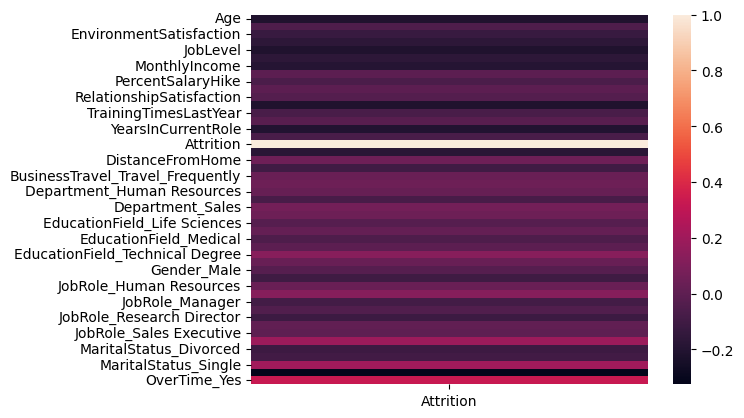

In [513]:
corr_matriz = EmpleadosAttrition_dummie.corr()
corr_label = corr_matriz['Attrition']
sns.heatmap(pd.DataFrame(corr_label))

### 15. Selecciona solo aquellas variables que tengan una correlación mayor o igual a 0.1, dejándolas en otro frame llamado EmpleadosAttritionFinal. No olvides mantener la variable de salidaAttrition; esto es equivalente a borrar las que no cumplen con el límite.

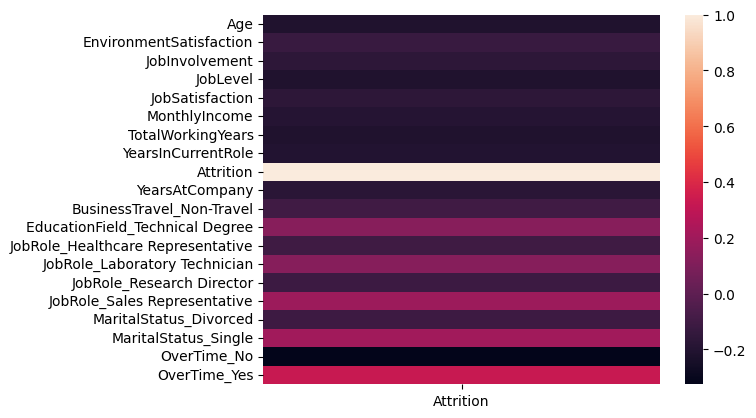

In [514]:
corr_final = corr_label[(corr_label >= 0.1) | (corr_label <= -0.1) ]
sns.heatmap(pd.DataFrame(corr_final))

variables_list = corr_final.index.to_list()
EmpleadosAttritionFinal = EmpleadosAttrition_dummie[variables_list]

### 16. Crea una nueva variable llamada EmpleadosAttritionPCA formada por los componentes principales del frame EmpleadosAttritionFinal. Recuerda que el resultado del proceso PCA es un numpy array, por lo que, para hacer referencia a una columna, por ejemplo, la 0, puedes usar la instrucción EmpleadosAttritionPCA[:,0]).

In [515]:
from sklearn.decomposition import PCA

pca = PCA()
EmpleadosAttritionPCA = pca.fit_transform(EmpleadosAttritionFinal)


### 17. Agrega el mínimo número de Componentes Principales en columnas del frame EmpleadosAttritionPCA que logren explicar el 80% de la varianza, al frame EmpleadosAttritionFinal. Puedes usar la instrucción assign, columna por columna, llamando a cada unaC0, C1, etc., hasta las que vayas a agregar.

In [516]:
#De acuerdo con la varianza explicada en el PCA, el primer componente principal aporta más del 99% de la varianza.
pca.explained_variance_ratio_

array([9.99994444e-01, 2.98291649e-06, 1.66314345e-06, 5.54721995e-07,
       1.68784118e-07, 5.23484450e-08, 5.17073135e-08, 2.27185612e-08,
       1.70854816e-08, 1.06984174e-08, 6.25666935e-09, 5.15086601e-09,
       4.48584248e-09, 4.07001498e-09, 3.35111411e-09, 3.08706809e-09,
       2.14778056e-09, 1.97018411e-09, 1.74990082e-09, 8.79512012e-25])

In [517]:
EmpleadosAttritionFinal = EmpleadosAttritionFinal.assign(C0 = EmpleadosAttritionPCA[:, 0])

###  18. Guarda el set de datos que has formado y que tienes en EmpleadosAttritionFinal en un archivo CSV llamado EmpleadosAttritionFinal.csv. Las últimas columnas que colocaste quedarán después de la variable Attrition, lo cual no importa, pero si gustas lo puedes arreglar antes de escribir el archivo.

In [518]:
EmpleadosAttritionFinal.columns
lista = ['Age', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'TotalWorkingYears',
       'YearsInCurrentRole', 'YearsAtCompany',
       'BusinessTravel_Non-Travel', 'EducationField_Technical Degree',
       'JobRole_Healthcare Representative', 'JobRole_Laboratory Technician',
       'JobRole_Research Director', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Single', 'OverTime_No',
       'OverTime_Yes', 'Attrition', 'C0']
EmpleadosAttritionFinal = EmpleadosAttritionFinal[lista]

In [519]:
EmpleadosAttritionFinal.to_csv("EmpleadosAttritionFinal.csv")